Dataset Content


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("netflix_titles_nov_2019.csv")

In [4]:
dataset.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [5]:
def data_details(df):
    
    print("The total movies and shows is :", df.shape[0])
    print("Total numbers of variables is: ", df.shape[1])
    
    print("----------"*10)
    
    print("The dataset columns are listed below: ")
    print(df.columns)
    
    print("----------"*10)
    
    print("The data type of each columns are: ")
    print(df.dtypes)
    
    print("----------"*10)
    print("The Missing rows in each columns are: \n")
    missing_number = df.isnull().sum()
    print(missing_number[missing_number > 0])
    
data_details(dataset)

The total movies and shows is : 5837
Total numbers of variables is:  12
----------------------------------------------------------------------------------------------------
The dataset columns are listed below: 
Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')
----------------------------------------------------------------------------------------------------
The data type of each columns are: 
show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object
----------------------------------------------------------------------------------------------------
The Missing rows in each columns are: 

director      1901
cast           556

## Data Cleaning Process

In [6]:
duplicated_data = dataset.duplicated(["title", "country", "type", "release_year"])
dataset[duplicated_data]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1134,80175351,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


In [7]:
# Drop the id columns
dataset = dataset.drop("show_id", axis="columns")   # You can sue axis = 1 also.


In [8]:
# Create a new column for the numbers of cast in each row
dataset["cast"] = dataset["cast"].replace(np.nan, "unknown")

def cast_count(cast):
    if cast == "unknown":
        return 0
    else:
        names = cast.split()
        number_of_cast = len(names)
        return number_of_cast

dataset["number_of_cast"] = dataset["cast"].apply(cast_count)
dataset["cast"] = dataset["cast"].replace("unknown", np.nan)

In [9]:
dataset = dataset.reset_index()

In [10]:
# Replacing the rating column with the mode because the data type is non numerical

dataset["rating"] = dataset["rating"].fillna(dataset["rating"].mode()[0])

In [11]:
# Replacing the missing values in the date_added column with january andthe mode of the release year.
dataset["date_added"] = dataset["date_added"].fillna('january 1 , {}'.format(dataset["release_year"].mode()[0]))   

In [12]:
for i,j in zip(dataset['country'].values,dataset.index):
    if i==np.nan:
        if ('Anime' in dataset.loc[j,'listed_in']) or ('anime' in dataset.loc[j,'listed_in']):
                dataset.loc[j,'country']='Japan'
        else:
            continue
    else:
        continue

In [13]:
# Converting the date time type from object to datetime.
dataset['date_added'] = pd.to_datetime(dataset["date_added"])

In [14]:
##  Exploratory Data Analysis

In [15]:
dataset["rating"].unique()

array(['TV-14', 'TV-G', 'TV-Y', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'PG', 'G',
       'PG-13', 'TV-Y7-FV', 'NR', 'UR', 'NC-17'], dtype=object)


we know that NR and UR are the same. so we need to fix this in the dataset.
we need to make all rows with UR as NR.

In [16]:
def no_rating(rating):
    if rating == "UR":
        rating = "NR"
    return rating

dataset["rating"] = dataset["rating"].apply(no_rating)

In [17]:
dataset["rating"].unique()

array(['TV-14', 'TV-G', 'TV-Y', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'PG', 'G',
       'PG-13', 'TV-Y7-FV', 'NR', 'NC-17'], dtype=object)

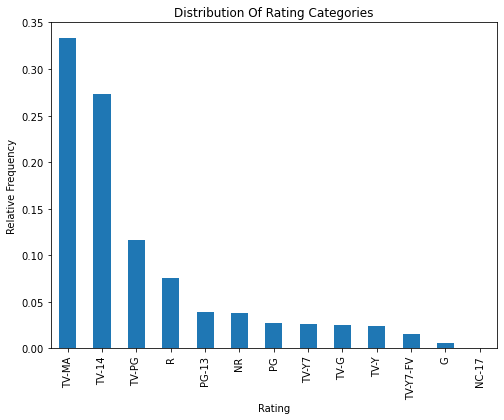

In [25]:
plt.figure(figsize = (8, 6))
dataset["rating"].value_counts(normalize= True).plot.bar()
plt.title("Distribution Of Rating Categories")
plt.xlabel("Rating")
plt.ylabel("Relative Frequency")
plt.show()

from the above graph of rating we can see that the highest occurence is TV-MA , followed by TV-14

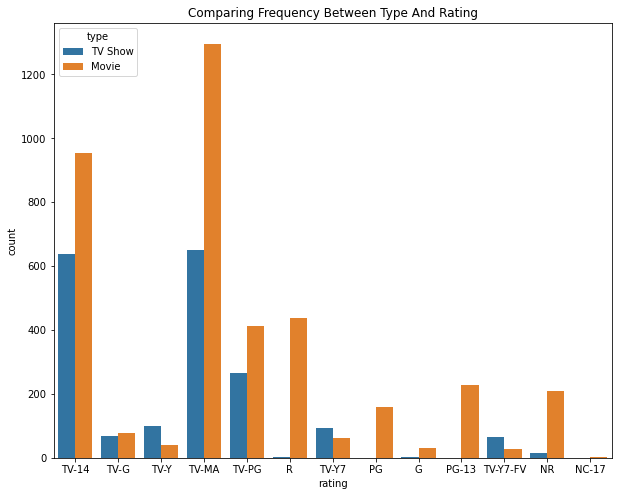

In [31]:
plt.figure(figsize= (10, 8))
sns.countplot(x= "rating", hue="type", data= dataset)
plt.title('Comparing Frequency Between Type And Rating')
plt.show()

From the above graph we can see that Movies is the major category in every rating except for TV-Y, TV-Y7, TV-Y7-FV where the TV shows has more than the movies. 

In [34]:
dataset["country"].value_counts().sort_values(ascending=False)

United States                                                                                               1907
India                                                                                                        697
United Kingdom                                                                                               336
Japan                                                                                                        168
Canada                                                                                                       139
                                                                                                            ... 
United Arab Emirates, Jordan                                                                                   1
Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands       1
Canada, United Kingdom, Netherlands                                                             

Since we have lots of countries in the dataset,we will focus more on the following countries.

{United State, India, United Kingdom, Japan, Canada, Spain and Nigeria}

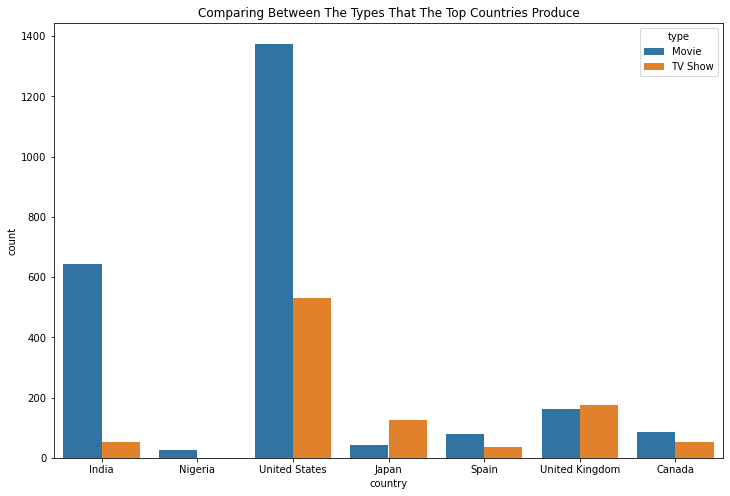

In [45]:
top_productive_countries = dataset[
    (dataset["country"] == "United States") | (dataset["country"] == "India") |
    (dataset["country"] == "United Kingdom")|(dataset["country"] == "Japan") | 
    (dataset["country"] == "Canada") | (dataset["country"] == "Spain") | 
    (dataset["country"] == "Nigeria")
]
plt.figure(figsize= (12, 8))
sns.countplot(x = "country", hue = "type", data = top_productive_countries)
plt.title("Comparing Between The Types That The Top Countries Produce")
plt.show()

From the graph we can see that the united kingdom and japan produces more tv shows than movies.

Now let's check for the number of ratings categories that we have in the above countries.

In [57]:
for i in top_productive_countries["country"].unique():
    print(i)
    print(top_productive_countries[top_productive_countries["country"] == i]["rating"].value_counts(normalize=True) * 100)
    print("---------" * 10)

India
TV-14       53.084648
TV-MA       23.529412
TV-PG       17.073171
NR           2.869440
TV-G         1.004304
TV-Y7        0.717360
PG-13        0.573888
PG           0.430416
TV-Y7-FV     0.286944
R            0.286944
TV-Y         0.143472
Name: rating, dtype: float64
------------------------------------------------------------------------------------------
Nigeria
TV-14    61.538462
TV-MA    26.923077
NR        7.692308
TV-PG     3.846154
Name: rating, dtype: float64
------------------------------------------------------------------------------------------
United States
TV-MA       31.515469
TV-14       17.409544
R           12.165705
TV-PG       10.854746
PG-13        7.079182
PG           4.876770
NR           4.824331
TV-G         3.198741
TV-Y7        2.621919
TV-Y7-FV     2.097535
TV-Y         2.045097
G            1.258521
NC-17        0.052438
Name: rating, dtype: float64
------------------------------------------------------------------------------------------
Japan
TV

In [62]:
# Creating a column for the year the mocies where produced.
dataset["year_added"] = dataset["date_added"].dt.year


In [66]:
dataset["type"].value_counts(normalize=True)

Movie      0.674833
TV Show    0.325167
Name: type, dtype: float64

Movies has the highest relative frequency.

In [83]:
dataset.groupby('year_added')["type"].value_counts(normalize=True)*100

year_added  type   
2008        Movie       50.000000
            TV Show     50.000000
2009        Movie      100.000000
2010        Movie      100.000000
2011        Movie      100.000000
2012        Movie       57.142857
            TV Show     42.857143
2013        Movie       66.666667
            TV Show     33.333333
2014        Movie      100.000000
2015        Movie       78.378378
            TV Show     21.621622
2016        Movie       64.077670
            TV Show     35.922330
2017        Movie       77.111486
            TV Show     22.888514
2018        Movie       56.847204
            TV Show     43.152796
2019        Movie       74.172545
            TV Show     25.827455
Name: type, dtype: float64

We can see that movies has the lead in every year.

In [91]:
dups = dataset.duplicated(["title"])
dataset[dups]["title"]

212                                      Drive
511                                     Tunnel
1134                                 Kakegurui
1244                                 Supergirl
1287                                 Limitless
1707                                    Shadow
1741                                    Sarkar
2362                               Oh My Ghost
2412                                  Love O2O
2767                                    Bleach
2803                                   One Day
2873                             The Innocents
2934                          The Birth Reborn
3050                               Oh My Ghost
3214                               Us and Them
3435                                      Troy
3485                                 Locked Up
3585                                      Love
3587                              The Outsider
3593                                     Benji
3660                                      Solo
3671         

In [98]:
for i in dataset[dups]["title"].values:
    print(dataset[dataset["title"] == i][['title','type','release_year','country']])
    print("----" * 20)

     title   type  release_year        country
101  Drive  Movie          2011  United States
212  Drive  Movie          2019          India
--------------------------------------------------------------------------------
       title     type  release_year      country
303   Tunnel  TV Show          2019          NaN
511   Tunnel  TV Show          2017  South Korea
4661  Tunnel    Movie          2016  South Korea
--------------------------------------------------------------------------------
          title     type  release_year country
957   Kakegurui  TV Show          2019   Japan
1134  Kakegurui  TV Show          2019   Japan
--------------------------------------------------------------------------------
          title     type  release_year                        country
492   Supergirl    Movie          1984  United Kingdom, United States
1244  Supergirl  TV Show          2019                  United States
---------------------------------------------------------------------

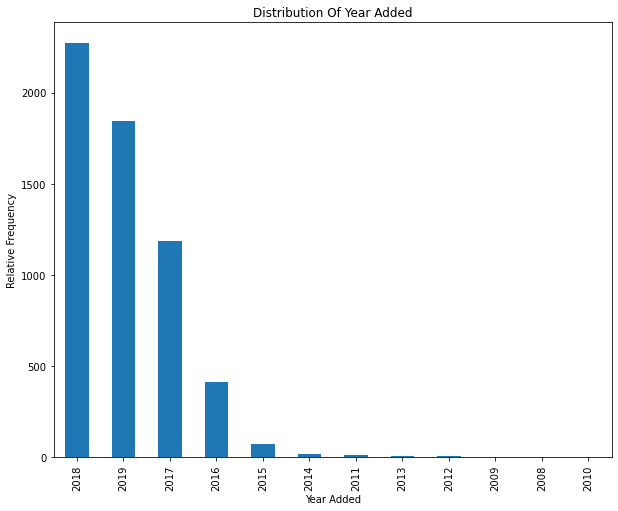

In [100]:
plt.figure(figsize = (10, 8))
dataset["year_added"].value_counts().plot.bar()
plt.title('Distribution Of Year Added')
plt.ylabel('Relative Frequency')
plt.xlabel('Year Added')
plt.show()

In [110]:
counts = 0
for i,j in zip(dataset["release_year"].values, dataset["year_added"].values):
    if i != j:
        counts += 1
print("Number of contents whose release year is different from the year they were added to netflix are", str(counts))

Number of contents whose release year is different from the year they were added to netflix are 3973
